In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.proportion import proportions_ztest


In [6]:

# Carregar os dados

url_1 = "https://raw.githubusercontent.com/CristianaMoura/Desafios_Individuais_DadosWomakersCode/refs/heads/main/5_exer_hipotese/pacientes.csv"
url_2 = "https://raw.githubusercontent.com/CristianaMoura/Desafios_Individuais_DadosWomakersCode/refs/heads/main/5_exer_hipotese/experimento_teste_ab.csv"


df_pacientes = pd.read_csv(url_1)
df_experimento = pd.read_csv(url_2)

df_frame = pd.concat([df_pacientes, df_experimento], axis=1)

# Visualizar as primeiras linhas
df_frame.head()


,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude,Visitante_ID,Versão_Página,Visualizações,Conversões
0,0.0,142.755809,31.0,1.0,1.0,1.0,Feminino,Afro-americano,Com condições de saúde adicionais,1,A,167,1
1,1.0,161.878468,35.0,1.0,1.0,0.0,Feminino,Afro-americano,Saudável,2,A,160,0
2,2.0,161.508259,39.0,0.0,3.0,1.0,Masculino,Asiático,Com condições de saúde adicionais,3,A,170,0
3,3.0,144.979408,43.0,1.0,3.0,1.0,Feminino,Asiático,Com condições de saúde adicionais,4,A,161,1
4,4.0,162.502954,55.0,0.0,2.0,1.0,Masculino,Hispânico,Com condições de saúde adicionais,5,A,104,0


In [8]:

# Resumo das bases
print("Resumo da base de pacientes:")
df_frame.info()


Resumo da base de pacientes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   float64
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   float64
 3   Genero             1000 non-null   float64
 4   Etnia              1000 non-null   float64
 5   Estado_Saude       1000 non-null   float64
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
 9   Visitante_ID       2000 non-null   int64  
 10  Versão_Página      2000 non-null   object 
 11  Visualizações      2000 non-null   int64  
 12  Conversões         2000 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 203.3+ KB


In [9]:

# Verificar valores nulos
print("\nValores nulos - Pacientes:")
print(df_frame.isnull().sum())




Valores nulos - Pacientes:
Unnamed: 0           1000
Pressao_Arterial     1000
Idade                1000
Genero               1000
Etnia                1000
Estado_Saude         1000
Nome_Genero          1000
Nome_Etnia           1000
Nome_Estado_Saude    1000
Visitante_ID            0
Versão_Página           0
Visualizações           0
Conversões              0
dtype: int64


In [10]:

# Estatísticas descritivas
print("\nEstatísticas descritivas - Pacientes:")
print(df_frame.describe())




Estatísticas descritivas - Pacientes:
        Unnamed: 0  Pressao_Arterial        Idade       Genero        Etnia  \
count  1000.000000       1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000        150.375623    49.757000     0.503000     1.526000   
std     288.819436          9.943613    11.682998     0.500241     1.104783   
min       0.000000        112.929821    30.000000     0.000000     0.000000   
25%     249.750000        144.240948    40.000000     0.000000     1.000000   
50%     499.500000        150.455624    49.000000     1.000000     2.000000   
75%     749.250000        156.792113    60.000000     1.000000     3.000000   
max     999.000000        181.803131    70.000000     1.000000     3.000000   

       Estado_Saude  Visitante_ID  Visualizações   Conversões  
count    1000.00000   2000.000000    2000.000000  2000.000000  
mean        0.51000   1000.500000     150.755500     0.115000  
std         0.50015    577.494589      28.809421     0.31

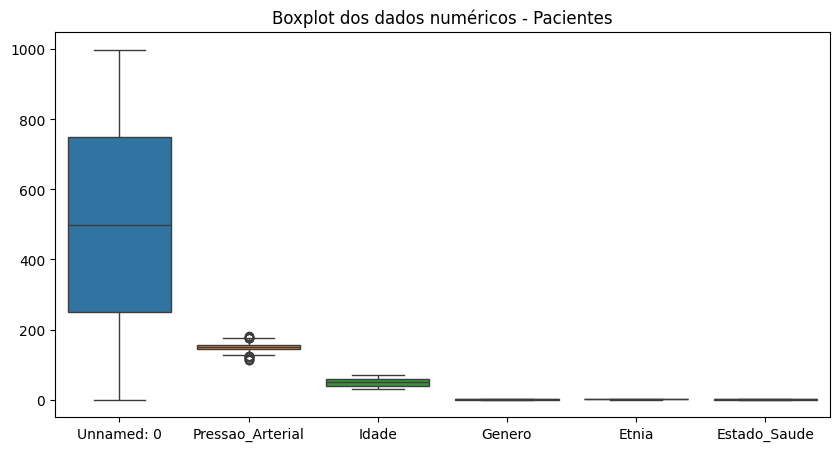

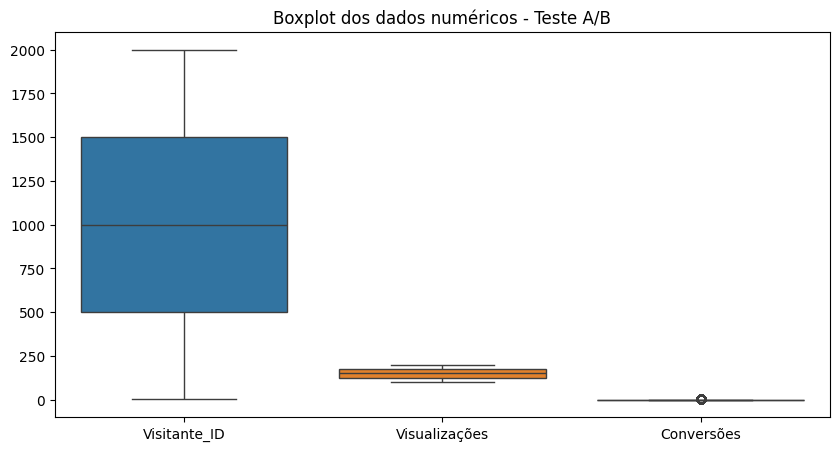

In [12]:

# Boxplot para identificar outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_pacientes.select_dtypes(include=np.number))
plt.title("Boxplot dos dados numéricos - Pacientes")
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_experimento.select_dtypes(include=np.number))
plt.title("Boxplot dos dados numéricos - Teste A/B")
plt.show()



In [13]:

# Tratamento de outliers usando o método do IQR
for col in df_pacientes.select_dtypes(include=np.number).columns:
    Q1 = df_pacientes[col].quantile(0.25)
    Q3 = df_pacientes[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_pacientes[col] = df_pacientes[col].clip(limite_inferior, limite_superior)

for col in df_experimento.select_dtypes(include=np.number).columns:
    Q1 = df_experimento[col].quantile(0.25)
    Q3 = df_experimento[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_experimento[col] = df_experimento[col].clip(limite_inferior, limite_superior)


In [20]:

# Teste de Hipóteses para a Taxa de Conversão

conversion_rates = df_experimento.groupby["Conversões"].mean()
print("\nTaxa de conversão por cenário:")
print(conversion_rates)


TypeError: 'method' object is not subscriptable

In [ ]:

# Cálculo do tamanho da amostra necessária
alpha = 0.05
power = 0.8
p1 = conversion_rates["A"]
p2 = 0.10  # Meta de conversão 10%
effect_size = (p2 - p1) / np.sqrt(p1 * (1 - p1))
sample_size = TTestIndPower().solve_power(effect_size, power=power, alpha=alpha, ratio=1)
print(f"\nTamanho da amostra necessária: {int(sample_size)}")


In [ ]:

# Salvando os dados tratados
pacientes_df.to_csv("/mnt/data/pacientes_limpo.csv", index=False)
ab_test_df.to_csv("/mnt/data/experimento_teste_ab_limpo.csv", index=False)

print("Arquivos tratados foram salvos!")
